In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits import mplot3d

In [2]:
# defined adaptive linear neuron - Adaline model
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [3]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [4]:
# load iris data
iris = datasets.load_iris()

# Task 1

1.	Download the sample Python code that comes with the assigned textbook, Python Machine Learning.
2.	Use the Iris dataset that’s referenced in the text.
3.	You can use the sample code from text as a starting point or you can write your own code from scratch.
4.	Pick two classes of data (i.e., two species of Iris) and two features from the four in the dataset, so that the data for two species are linearly separable using the features that you have chosen. *Then Apply the Perceptron and Adaline models to the classes/features that you have chosen and report your results.

In [5]:
# select Iris_setosa and Iris_versicolor [0:100] & extract sepal length and petal length [0,2]
X, y = iris.data[0:100, [0,2]], iris.target[0:100]
pd.DataFrame(X).describe()

,0,1
count,100.000000,100.000000
mean,5.471000,2.861000
std,0.641698,1.449549
min,4.300000,1.000000
25%,5.000000,1.500000
50%,5.400000,2.450000
75%,5.900000,4.325000
max,7.000000,5.100000


In [6]:
pd.DataFrame(y).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       100 non-null    int32
dtypes: int32(1)
memory usage: 528.0 bytes


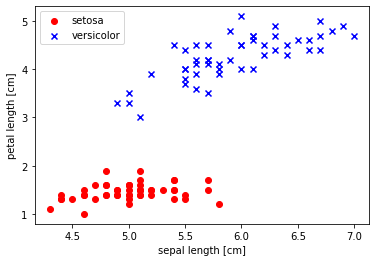

In [7]:
# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

In [8]:
# split the dataset into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)
print('y count',np.bincount(y))
print('y_train count',np.bincount(y_train))
print('y_test count',np.bincount(y_test))

y count [50 50]
y_train count [45 45]
y_test count [5 5]


In [9]:
# standard the features
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [10]:
# Training a perceptron via scikit-learn
ppn = Perceptron()
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)
print('Miss-classified samples: %d' %((y_test != y_pred).sum()))
print('Accuracy: %.2f' %accuracy_score(y_test,y_pred))

Miss-classified samples: 0
Accuracy: 1.00


C:\Users\Qingyuan\AppData\Local\Temp/ipykernel_14548/3930661417.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


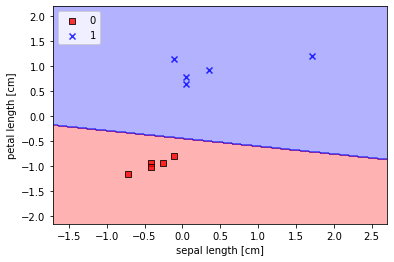

In [11]:
# plotting the results
plot_decision_regions(X_test_std, y_test, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

In [12]:
# Training  Adaline model
ada = AdalineGD(eta=0.0001)
ada.fit(X_train_std, y_train)
y_pred = ada.predict(X_test_std)
print('Miss-classified samples: %d' %((y_test != y_pred).sum()))
print('Accuracy: %.2f' %accuracy_score(y_test,y_pred))

Miss-classified samples: 5
Accuracy: 0.50


C:\Users\Qingyuan\AppData\Local\Temp/ipykernel_14548/3930661417.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


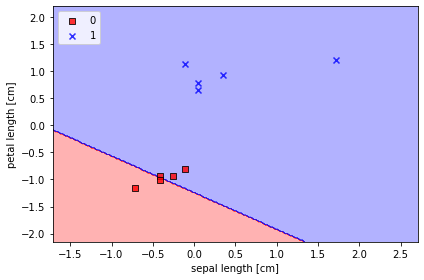

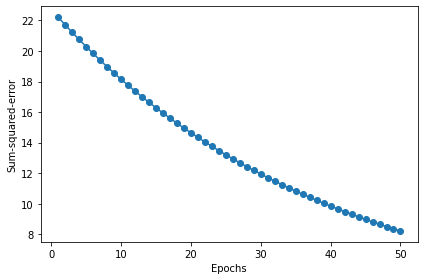

In [13]:
# plotting the results
plot_decision_regions(X_test_std, y_test, classifier=ada)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.tight_layout()
plt.show()

5.	Repeat Step 4) using three features at a time.

In [14]:
# select Iris_setosa and Iris_versicolor [0:100] & extract sepal length, sepal width, and petal length 0:3
X, y = iris.data[0:100, 0:3], iris.target[0:100]
pd.DataFrame(X).describe()

,0,1,2
count,100.000000,100.000000,100.000000
mean,5.471000,3.099000,2.861000
std,0.641698,0.478739,1.449549
min,4.300000,2.000000,1.000000
25%,5.000000,2.800000,1.500000
50%,5.400000,3.050000,2.450000
75%,5.900000,3.400000,4.325000
max,7.000000,4.400000,5.100000


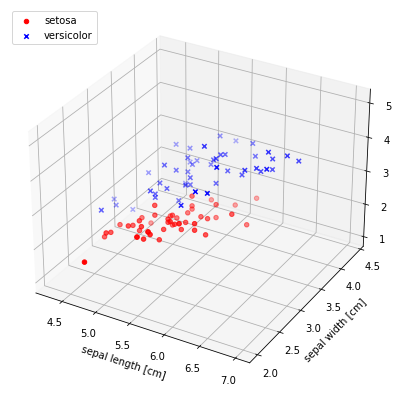

In [15]:
# plotting the data
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(X[:50, 0], X[:50, 1], X[:50,2], 
             color='red', marker='o', label='setosa')
ax.scatter3D(X[50:100, 0], X[50:100, 1], X[50:100,2], 
             color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.legend(loc='upper left')
 
# show plot
plt.show()

In [16]:
# split the dataset into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)
X_train[:3,]

array([[4.8, 3.1, 1.6],
       [5.4, 3.4, 1.7],
       [4.8, 3. , 1.4]])

In [17]:
# standard the features
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [18]:
# Training a perceptron via scikit-learn
ppn = Perceptron()
ppn.fit(X_train, y_train)
y_pred = ppn.predict(X_test_std)
print('Miss-classified samples: %d' %((y_test != y_pred).sum()))
print('Accuracy: %.2f' %accuracy_score(y_test,y_pred))

Miss-classified samples: 0
Accuracy: 1.00


In [19]:
# Training  adaline model
ada = AdalineGD(eta=0.0001)
ada.fit(X_train_std, y_train)
y_pred = ada.predict(X_test_std)
print('Miss-classified samples: %d' %((y_test != y_pred).sum()))
print('Accuracy: %.2f' %accuracy_score(y_test,y_pred))

Miss-classified samples: 5
Accuracy: 0.50


6.	Repeat Step 4) using all four features

In [20]:
# select Iris_setosa and Iris_versicolor [0:100] & extract all features
X, y = iris.data[0:100, :], iris.target[0:100]
pd.DataFrame(X).describe()

,0,1,2,3
count,100.000000,100.000000,100.000000,100.000000
mean,5.471000,3.099000,2.861000,0.786000
std,0.641698,0.478739,1.449549,0.565153
min,4.300000,2.000000,1.000000,0.100000
25%,5.000000,2.800000,1.500000,0.200000
50%,5.400000,3.050000,2.450000,0.800000
75%,5.900000,3.400000,4.325000,1.300000
max,7.000000,4.400000,5.100000,1.800000


In [21]:
# split training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)
X_train[:3,]

array([[5.6, 2.5, 3.9, 1.1],
       [5. , 3.5, 1.6, 0.6],
       [5.1, 3.4, 1.5, 0.2]])

In [22]:
# standandardized the features
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [23]:
# Training a perceptron via scikit-learn
ppn = Perceptron()
ppn.fit(X_train, y_train)
y_pred = ppn.predict(X_test_std)
print('Miss-classified samples: %d' %((y_test != y_pred).sum()))
print('Accuracy: %.2f' %accuracy_score(y_test,y_pred))

Miss-classified samples: 0
Accuracy: 1.00


In [24]:
# Training  adaline model
ada = AdalineGD(eta=0.0001)
ada.fit(X_train_std, y_train)
y_pred = ada.predict(X_test_std)
print('Miss-classified samples: %d' %((y_test != y_pred).sum()))
print('Accuracy: %.2f' %accuracy_score(y_test,y_pred))

Miss-classified samples: 5
Accuracy: 0.50


# Task 2

7.	Pick two classes of data (i.e., two species of Iris) and two features from the four in the dataset, so that the data for two species are NOT linearly separable using the features that you have chosen.* Then Apply the Perceptron and Adaline models to the classes/features that you have chosen and report your results.

In [25]:
# select Iris_versicolor and Iris_virginica [50:150] & extract sepal length and sepal width 0:2
X, y = iris.data[50:150, 0:2], iris.target[50:150]
pd.DataFrame(X).describe()

,0,1
count,100.000000,100.000000
mean,6.262000,2.872000
std,0.662834,0.332751
min,4.900000,2.000000
25%,5.800000,2.700000
50%,6.300000,2.900000
75%,6.700000,3.025000
max,7.900000,3.800000


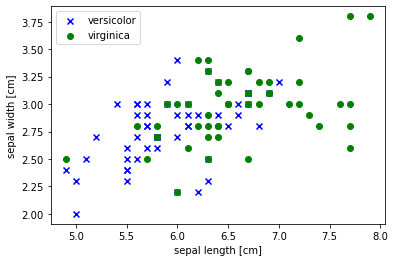

In [26]:
# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='blue', marker='x', label='versicolor')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='green', marker='o', label='virginica')

plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.legend(loc='upper left')

In [27]:
# train & test subset split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)
X_train[:3]

array([[5.5, 2.4],
       [6. , 3.4],
       [7.2, 3.2]])

In [28]:
# standardize the features
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [29]:
# Training a perceptron via scikit-learn
ppn = Perceptron()
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)
print('Miss-classified samples: %d' %((y_test != y_pred).sum()))
print('Accuracy: %.2f' %accuracy_score(y_test,y_pred))

Miss-classified samples: 5
Accuracy: 0.50


C:\Users\Qingyuan\AppData\Local\Temp/ipykernel_14548/3930661417.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


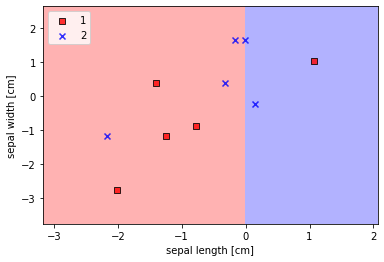

In [30]:
# plotting the results
plot_decision_regions(X_test_std, y_test, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.legend(loc='upper left')

In [31]:
# Training  adaline model
ada = AdalineGD(eta=0.0001)
ada.fit(X_train_std, y_train)
y_pred = ada.predict(X_test_std)
print('Miss-classified samples: %d' %((y_test != y_pred).sum()))
print('Accuracy: %.2f' %accuracy_score(y_test,y_pred))

Miss-classified samples: 5
Accuracy: 0.50


C:\Users\Qingyuan\AppData\Local\Temp/ipykernel_14548/3930661417.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


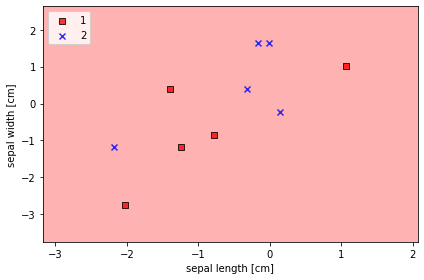

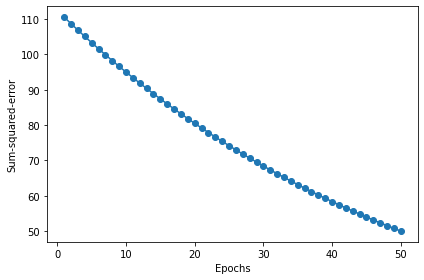

In [32]:
# plotting the results
plot_decision_regions(X_test_std, y_test, classifier=ada)
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.tight_layout()
plt.show()

8. using 3 features a time

In [33]:
# select Iris_versicolor and Iris_virginica [50:150] & extract sepal length, sepal width, and petal length 0:3
X, y = iris.data[50:150, 0:3], iris.target[50:150]
pd.DataFrame(X).describe()

,0,1,2
count,100.000000,100.000000,100.000000
mean,6.262000,2.872000,4.906000
std,0.662834,0.332751,0.825578
min,4.900000,2.000000,3.000000
25%,5.800000,2.700000,4.375000
50%,6.300000,2.900000,4.900000
75%,6.700000,3.025000,5.525000
max,7.900000,3.800000,6.900000


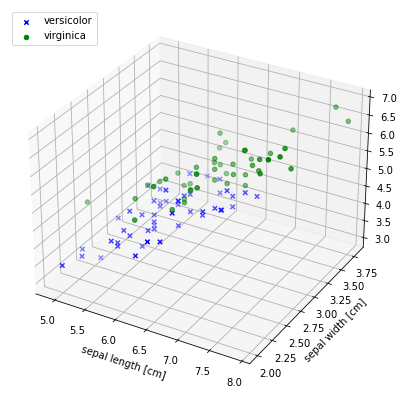

In [34]:
# plotting the data
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(X[:50, 0], X[:50, 1], X[:50,2], 
             color='blue', marker='x', label='versicolor')
ax.scatter3D(X[50:100, 0], X[50:100, 1], X[50:100,2], 
             color='green', marker='o', label='virginica')

plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.legend(loc='upper left')
 
# show plot
plt.show()

In [35]:
# split the dataset into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)
X_train[:3,]

array([[7.1, 3. , 5.9],
       [6.1, 2.9, 4.7],
       [7. , 3.2, 4.7]])

In [36]:
# standardize the features
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [37]:
# Training a perceptron via scikit-learn
ppn = Perceptron()
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)
print('Miss-classified samples: %d' %((y_test != y_pred).sum()))
print('Accuracy: %.2f' %accuracy_score(y_test,y_pred))

Miss-classified samples: 0
Accuracy: 1.00


In [38]:
# Training  adaline model
ada = AdalineGD(eta=0.0001)
ada.fit(X_train_std, y_train)
y_pred = ada.predict(X_test_std)
print('Miss-classified samples: %d' %((y_test != y_pred).sum()))
print('Accuracy: %.2f' %accuracy_score(y_test,y_pred))

Miss-classified samples: 5
Accuracy: 0.50


9. Repeat Step 7) using all four features at the same time.

In [39]:
# select Iris_versicolor and Iris_virginica [50:150] & extract all 4 features
X, y = iris.data[50:150, :], iris.target[50:150]
pd.DataFrame(X).describe()

,0,1,2,3
count,100.000000,100.000000,100.000000,100.000000
mean,6.262000,2.872000,4.906000,1.676000
std,0.662834,0.332751,0.825578,0.424769
min,4.900000,2.000000,3.000000,1.000000
25%,5.800000,2.700000,4.375000,1.300000
50%,6.300000,2.900000,4.900000,1.600000
75%,6.700000,3.025000,5.525000,2.000000
max,7.900000,3.800000,6.900000,2.500000


In [40]:
# split the dataset into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)
X_train[:3,]

array([[7.2, 3.6, 6.1, 2.5],
       [6.7, 3.3, 5.7, 2.1],
       [6.6, 3. , 4.4, 1.4]])

In [41]:
# standardize the features
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [42]:
# Training a perceptron via scikit-learn
ppn = Perceptron()
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)
print('Miss-classified samples: %d' %((y_test != y_pred).sum()))
print('Accuracy: %.2f' %accuracy_score(y_test,y_pred))

Miss-classified samples: 3
Accuracy: 0.70


In [43]:
# Training  adaline model
ada = AdalineGD(eta=0.0001)
ada.fit(X_train_std, y_train)
y_pred = ada.predict(X_test_std)
print('Miss-classified samples: %d' %((y_test != y_pred).sum()))
print('Accuracy: %.2f' %accuracy_score(y_test,y_pred))

Miss-classified samples: 5
Accuracy: 0.50


# Task3	

Compare your results for the Perceptron and Adaline models
##1. data for two species are linearly separable
a. with 2 classes x 2 features:
perceptron model predicted value has accuracy of 1.0
adaline model predicted value has accuracy of .5

b. 2 classes x 3 features
perceptron model predicted value has accuracy of .9
adaline model predicted value has accuracy of .5

c. 2 classes x 4 features
perceptron model predicted value has accuracy of 1.0
adaline model predicted value has accuracy of .5

##2. data for two species are not linearly separable
a. 2 classes x 2 features:
perceptron model predicted value has accuracy of .5
adaline model predicted value has accuracy of .5

b. 2 classes x 3 features
perceptron model predicted value has accuracy of 1.0
adaline model predicted value has accuracy of .5

c. 2 classes x 4 features
perceptron model predicted value has accuracy of .7
adaline model predicted value has accuracy of .5